# E-tivity 3: Linear classification
## MSc in AI - CE6002 & CS5062
Student Name: Michel Danjou

Student ID: 18263461

In [1]:
#%reset
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

# Task 3 (CE6002)
#### *Create your own implementation of linear classification to perform a classification of the dataset provided in the Etivity3_LinearClassification.ipynb notebook without adding extra features to those provided. Use normal linear regression with sign(wTx) to obtain a classification. Notebook Etivity3_LinearClassification.ipynb is available in the git repository. Add your code to this notebook.*
 
Interesting reads: 
  * https://machinelearningmastery.com/solve-linear-regression-using-linear-algebra/
  * https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.9-The-Moore-Penrose-Pseudoinverse/


X.shape        :(1000, 2)
y.len          :1000
X_inverse      :[[ 0.00198517  0.00084192 -0.00236257 ...  0.00167061 -0.00092053
   0.00092587]
 [-0.00071426 -0.00171032  0.00059626 ...  0.00178054  0.00226591
  -0.00215611]]
X_inverse.shape:(2, 1000)
w_lin          :[0.00333248 0.00229672]
w_lin_dot      :[0.00333248 0.00229672]
minx           : -1.1327139232277583
maxx           : 1.1191684010886536
vert.shape     : (1000, 2)


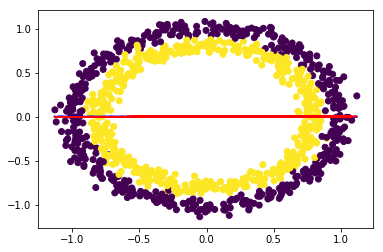

In [4]:
# Calculate pseudo-inverse
X_inverse = np.linalg.pinv(X)
w_lin = np.matmul(X_inverse, y)
w_lin_dot = X_inverse.dot(y)

minx = np.amin(X)
maxx = np.amax(X)
horz = np.linspace(minx, maxx, 1000)
vert = w_lin[0]*X + w_lin[1]

print("X.shape        :{}".format(X.shape))
print("y.len          :{}".format(len(y)))
print("X_inverse      :{}".format(X_inverse ))
print("X_inverse.shape:{}".format(X_inverse.shape ))
print("w_lin          :{}".format(w_lin))
print("w_lin_dot      :{}".format(w_lin_dot))
print("minx           :", minx)
print("maxx           :", maxx)
print("vert.shape     :", vert.shape)


plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(horz, vert, color='blue')

# Alternative approach for drawing the separating line.
yhat = X.dot(w_lin)
plt.plot(X, yhat, color='red')
sign = np.sign(yhat)


#### *Observe your results and explain why these results seem disappointing (record your thoughts in a Markdown cell in your notebook).*

The demarcation mark between the 2 sets of data is correct as it evenly splits both values representing each y values. However it is of no real value.



#### *Now choose suitable new features and use these in your linear regression algorithm to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved. Try a few different ones and note the differences!*

Interesting reads: 
  *   https://www.deeplearningbook.org/contents/ml.html (page 110, figure 5.16)

In [5]:
Xcopy = np.copy(X)

yhat           : -0.2075688124021275
X.shape        :(1000, 2)
y.len          :1000
X_inverse      :[[ 0.00267873 -0.0002023   0.00388303 ...  0.00122279 -0.00063694
  -0.00051278]
 [-0.00056785  0.00190554 -0.00106403 ...  0.00159212  0.00343845
   0.00309202]]
X_inverse.shape:(2, 1000)
w_lin          :[-0.25571991 -0.24421787]
w_lin_dot      :[-0.25571991 -0.24421787]
minx           : 2.1991720266616742e-08
maxx           : 1.28304083187402
miny           : 0.8499329149578224
maxy           : -0.49353582316058836
vert.shape     : (1000, 2)


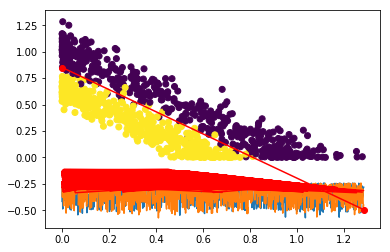

In [6]:
# Calculate pseudo-inverse
X = np.copy(Xcopy)
X = np.square(X)
X_inverse = np.linalg.pinv(X)
w_lin = np.matmul(X_inverse, y)
w_lin_dot = X_inverse.dot(y)

minx = np.amin(X)
maxx = np.amax(X)
horz = np.linspace(minx, maxx, 1000)
vert = w_lin[0]*X + w_lin[1]


plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(horz, vert)

yhat = X.dot(w_lin)
plt.plot(X, yhat, color='red')

print("yhat           :", yhat.mean() )

def decision_boundary_lin(weights, x_min, x_max, bias):
   # Return two points on the decision boundary
   return [point_on_boundary_lin(weights, x_min, bias), point_on_boundary_lin(weights, x_max, bias)]

# HACK !!!!
def point_on_boundary_lin(weights, x, bias):
    # Return the y-position on the boundary based on given x-position
    return -(bias+weights[0]*x)/weights[1]

x_min = minx
x_max = maxx

# HACK !!!! 
# Was pocking around at various values to plot the line. 
# Looks like abs(yhat.mean()) allows us to plot a nice separating line.
# Can't find any rationale to support this. More than likely just a coincidence.
bias = abs(yhat.mean())

miny, maxy = decision_boundary_lin(w_lin, minx, maxx, bias)
plt.plot([minx, maxx], [miny, maxy], 'ro-')

print("X.shape        :{}".format(X.shape))
print("y.len          :{}".format(len(y)))
print("X_inverse      :{}".format(X_inverse ))
print("X_inverse.shape:{}".format(X_inverse.shape ))
print("w_lin          :{}".format(w_lin))
print("w_lin_dot      :{}".format(w_lin_dot))
print("minx           :", minx)
print("maxx           :", maxx)
print("miny           :", miny)
print("maxy           :", maxy)
print("vert.shape     :", vert.shape)


### Alternative approach. Using PLA. !!!! REMOVE !!!

Random weights: [ 0.82591201 -0.60474606 -0.60135711]
Iteration:1/10
Pocketing weights:[ 0.82591201 -0.58773751 -1.09718371] e:0.255 found at iterations:1
Pocketing weights:[ 1.82591201 -1.27527225 -2.53799299] e:0.25375 found at iterations:1
Pocketing weights:[ 1.82591201 -1.73181858 -2.420602  ] e:0.14 found at iterations:1
Pocketing weights:[ 1.82591201 -2.57214291 -1.96982205] e:0.06125 found at iterations:1
Pocketing weights:[ 1.82591201 -2.24289983 -2.48915427] e:0.04375 found at iterations:1
Pocketing weights:[ 2.82591201 -3.11228    -3.61912405] e:0.04125 found at iterations:1
Pocketing weights:[ 2.82591201 -3.37830056 -3.46222411] e:0.01875 found at iterations:1
Iteration:2/10
Pocketing weights:[ 4.82591201 -6.22407022 -5.71674158] e:0.0175 found at iterations:2
Iteration:3/10
Iteration:4/10
Pocketing weights:[ 6.82591201 -8.68613143 -8.16087552] e:0.01625 found at iterations:4
Iteration:5/10
Iteration:6/10
Iteration:7/10
Iteration:8/10
Iteration:9/10
Iteration:10/10


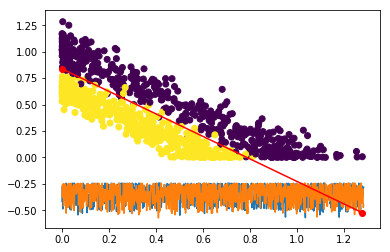

In [7]:
def pocket(training_in, training_out, weights, max_iterations):
    bias = np.array([1])
    iterations=0

    # initialise the pocket algorithm variables
    best_weights = weights
    best_weights_iteration = 0
    best_e = calc_error(training_in, training_out, weights)
    
    while iterations < max_iterations:
        errors = 0;
        iterations+=1;
        print("Iteration:{}/{}".format(iterations, max_iterations))
        
        for x,y in zip(training_in, training_out):           
            if (h(x,weights)!=y):
                
                # pocket best results
                e = calc_error(training_in, training_out, weights)
                if (e < best_e):
                    best_e = e
                    best_weights = weights
                    best_weights_iteration = iterations
                    print("Pocketing weights:{} e:{} found at iterations:{}".format(best_weights, best_e, best_weights_iteration))
                
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;                
            
        if (errors == 0):
            print("Hypothesis found. Nb iterations:", iterations)
            break
            
    return best_weights, best_weights_iteration, best_e, iterations 


def generate_weights():
    weights = np.array([np.random.uniform(-1,1) for i in range(3)])
    print("Random weights:", weights)
    return weights


def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)


def h(x,w):

    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))


def decision_boundary(weights, x_min, x_max):
   # Return two points on the decision boundary
   return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]


def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]


# Number of iterations before exiting the PLA.
max_iterations = 10
weights = generate_weights()
X_shuffled, y_shuffled = shuffle(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2)

best_weights, best_weights_iteration, best_e, total_iterations = \
pocket(X_train, y_train, weights, max_iterations)

x_min = min(X[:,0])
x_max = max(X[:,0])
y_min, y_max = decision_boundary(best_weights, x_min, x_max)
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(horz, vert)
plt.plot([x_min, x_max], [y_min, y_max], 'ro-')
plt.show()

#### *Also, use scikit-learn’s Logistic Regression algorithm and compare the performance with your algorithm. It is useful to spend some time thinking about the difference in approach taken in Logistic Regression.*